# OpenPifPaf Pose Estimation

In [ ]:
!pip install --upgrade openpifpaf==0.10.1

import io
import numpy as np
import openpifpaf
import PIL
import requests
import torch

print(openpifpaf.__version__)
print(torch.__version__)

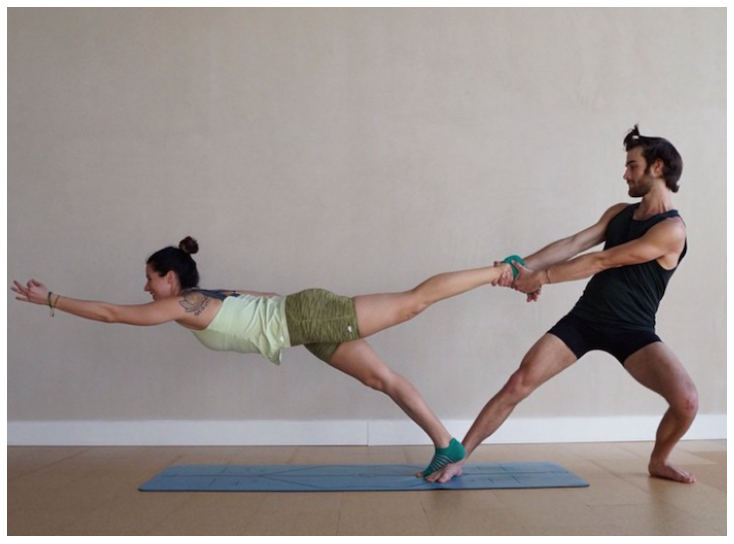

In [ ]:
image_response = requests.get('https://i.pinimg.com/originals/8e/30/a6/8e30a6c50bcf6c3dd8fc0ed025df48f4.png')
pil_im = PIL.Image.open(io.BytesIO(image_response.content)).convert('RGB')
im = np.asarray(pil_im)
with openpifpaf.show.image_canvas(im) as ax:
  pass

In [ ]:
net_cpu, _ = openpifpaf.network.factory(checkpoint='resnet101')

Downloading: "https://github.com/vita-epfl/openpifpaf-torchhub/releases/download/v0.10.0/resnet101block5-pif-paf-paf25-edge401-191012-132602-a2bf7ecd.pkl" to /root/.cache/torch/checkpoints/resnet101block5-pif-paf-paf25-edge401-191012-132602-a2bf7ecd.pkl


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'openpifpaf.network.nets.Shell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'openpifpaf.network.basenetworks.BaseNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attri

In [ ]:
net = net_cpu.cuda()
decode = openpifpaf.decoder.factory_decode(net, 
                                           seed_threshold=0.5)
processor = openpifpaf.decoder.Processor(net, decode, 
                                         instance_threshold=0.2,
                                         keypoint_threshold=0.3)

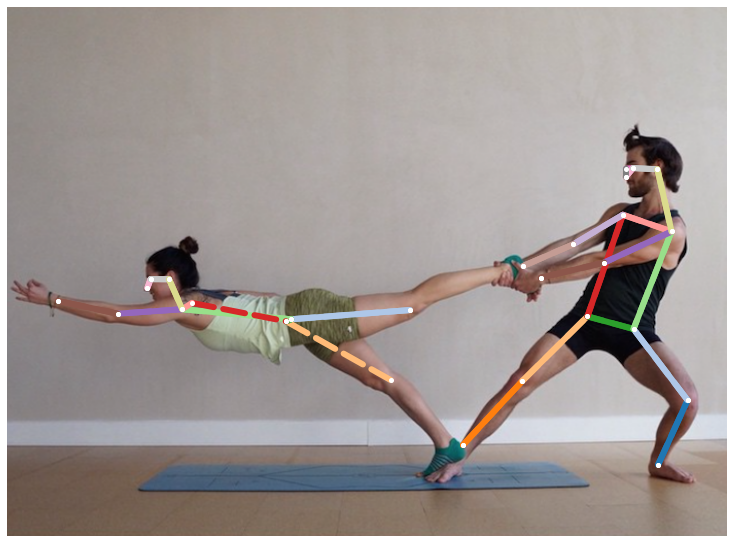

In [ ]:
data = openpifpaf.datasets.PilImageList([pil_im])
loader = torch.utils.data.DataLoader(data, batch_size=1, pin_memory=True)

keypoint_painter = openpifpaf.show.KeypointPainter(color_connections=True, linewidth=6)

for images_batch, _, __ in loader:
  images_batch = images_batch.cuda()
  fields_batch = processor.fields(images_batch)
  predictions = processor.annotations(fields_batch[0])
  
  with openpifpaf.show.image_canvas(im) as ax:
    keypoint_painter.annotations(ax, predictions)